In [43]:
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

df1 = pd.read_csv('unsupervised_data/daily_data_unlabeled.csv')
print(df1.head)
df1 =df1.drop(columns=df1.columns[0], axis=1)


df2 = pd.read_csv('data/daily_data_3_values.csv')
df2 = df2.drop(df2.columns[[0, 3, 4]], axis=1)
df2.head()

<bound method NDFrame.head of       Unnamed: 0  steps  heart_rate
0              0   6259       85.56
1              1   2524       77.79
2              2   1636       78.25
3              3   2640       80.02
4              4   2239       79.93
...          ...    ...         ...
1366        1366   4399       71.22
1367        1367   9993       75.98
1368        1368   6722       76.48
1369        1369   7868       72.51
1370        1370   2751       61.58

[1371 rows x 3 columns]>


,steps,heart_rate
0,867,88.11
1,10730,87.16
2,8222,86.96
3,13984,86.84
4,11294,86.93


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

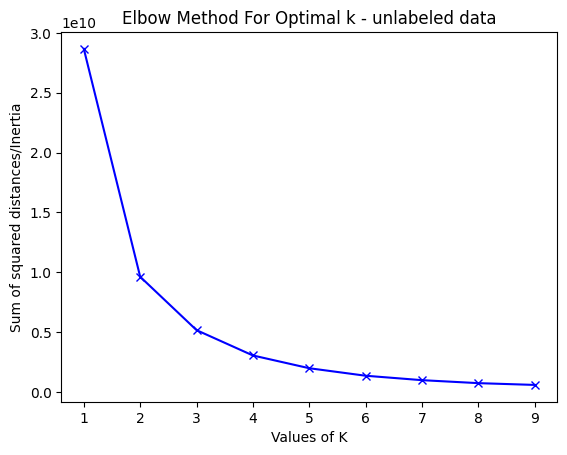

In [44]:

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df1)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k - unlabeled data')
plt.show()


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

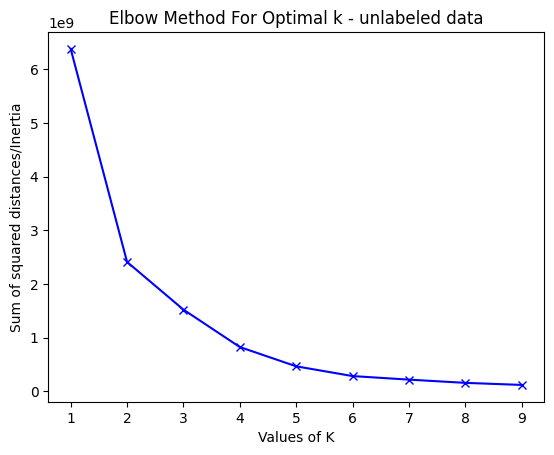

In [45]:
kmeans = None
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df2)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k - unlabeled data')
plt.show()


C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


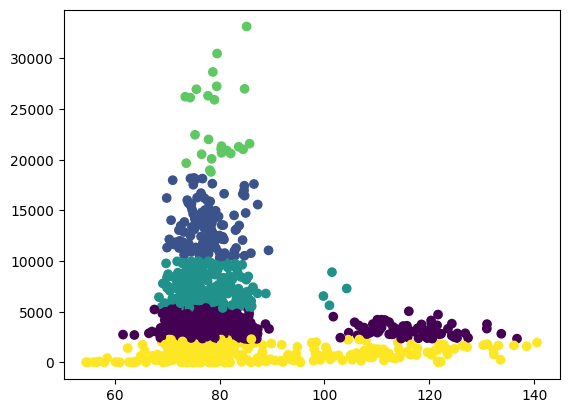

In [46]:
#KMeans
km1 = KMeans(n_clusters=5)
km1.fit(df1)
km1.predict(df1)
labels = km1.labels_

plt.scatter(df1['heart_rate'], df1['steps'], c=km1.labels_, cmap='viridis')
centers = km1.cluster_centers_
plt.show()

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


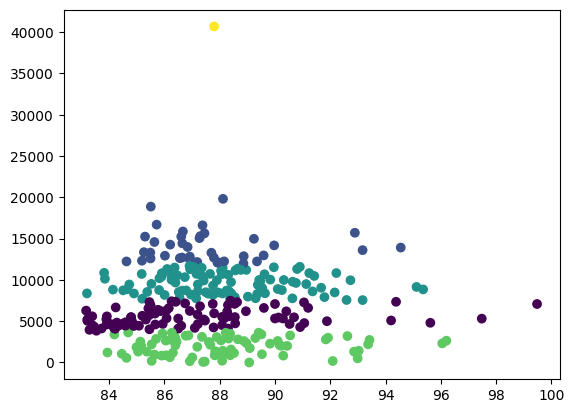

In [47]:
km2 = KMeans(n_clusters=5)
km2.fit(df2)
km2.predict(df2)
labels = km2.labels_


plt.scatter(df2['heart_rate'], df2['steps'], c=km2.labels_, cmap='viridis')
centers = km2.cluster_centers_

plt.show()

C:\Users\Karolina\AppData\Local\Temp\ipykernel_27240\1969644611.py:19: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x=df3['heart_rate'],y=df3['steps'],  palette=palette, hue=Y, legend='full')


<Axes: xlabel='heart_rate', ylabel='steps'>

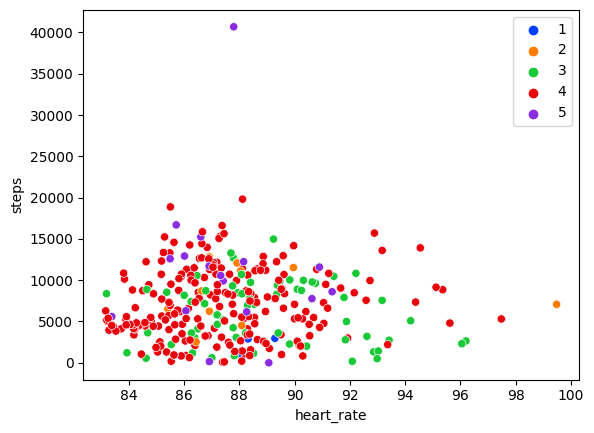

In [48]:
from sklearn.neighbors import KNeighborsClassifier
df3 = pd.read_csv('data/daily_data_5_values.csv')
neigh = KNeighborsClassifier(n_neighbors=2)

Y = df3['feeling_rate'].values
df3 = df3.drop(df3.columns[[0, 3, 4]], axis=1)
df3.head()
X = df3.values


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=71830, stratify=Y)
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)
X_resampled, Y_resampled = SMOTE().fit_resample(X_resampled, Y_resampled)
neigh.fit(X_resampled, Y_resampled)


palette = sns.color_palette("bright", 10) #Chossing color 
sns.scatterplot(x=df3['heart_rate'],y=df3['steps'],  palette=palette, hue=Y, legend='full')

 
# sns.scatterplot(X[:,0],X[:,1],legend='full',c=palette[y])


In [49]:
Y_pred = neigh.predict(X_test)

#Balanced acuurancy
balanced_accurancy = balanced_accuracy_score(Y_test, Y_pred)
print(str('Balanced accuracy ') + str(balanced_accurancy))

#Clasification report
print(classification_report(Y_test, Y_pred))


Balanced accuracy 0.3238095238095238
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         2
           3       0.19      0.36      0.25        14
           4       0.48      0.26      0.34        42
           5       0.00      0.00      0.00         3

    accuracy                           0.27        62
   macro avg       0.23      0.32      0.25        62
weighted avg       0.38      0.27      0.30        62



[2 2 4 ... 4 3 3]
   feeling_rate
0             2
1             2
2             4
3             4
4             3
   steps  heart_rate  feeling_rate
0   6259       85.56             2
1   2524       77.79             2
2   1636       78.25             4
3   2640       80.02             4
4   2239       79.93             3
Balanced accuracy 0.3476190476190476
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         2
           3       0.23      0.36      0.28        14
           4       0.57      0.38      0.46        42
           5       0.00      0.00      0.00         3

    accuracy                           0.35        62
   macro avg       0.26      0.35      0.28        62
weighted avg       0.45      0.35      0.38        62



C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Karolina\AppData\Local\Temp\ipykernel_27240\563250468.py:13: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(x=result['heart_rate'],y=result['steps'],  palette=palette, hue=Y, legend='full')


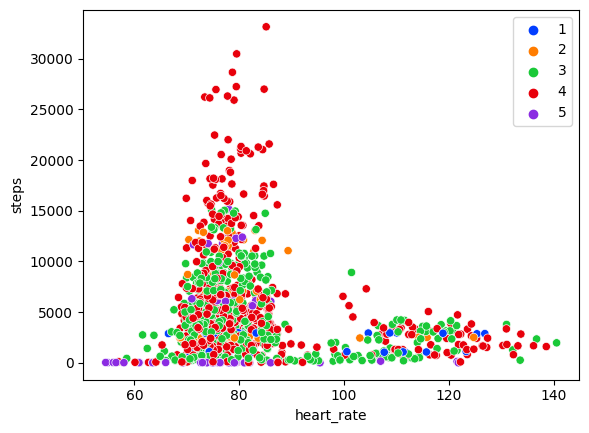

In [50]:
lab_Y = neigh.predict(df1)
print(lab_Y)
df_pseudo = pd.DataFrame(lab_Y, columns=['feeling_rate'])
print(df_pseudo.head())

result = pd.concat([df1, df_pseudo], axis=1)
print(result.head())

X = result.drop(['feeling_rate'], axis=1).values
Y = result['feeling_rate'].values

palette = sns.color_palette("bright", 10) #Chossing color 
sns.scatterplot(x=result['heart_rate'],y=result['steps'],  palette=palette, hue=Y, legend='full')

neigh2 = KNeighborsClassifier(n_neighbors=3)
x_comined = np.concatenate((X, X_train))
y_comined = np.concatenate((Y, Y_train))

neigh2.fit(x_comined, y_comined )

Y_pred = neigh2.predict(X_test)
#Balanced acuurancy
balanced_accurancy = balanced_accuracy_score(Y_test, Y_pred)
print(str('Balanced accuracy ') + str(balanced_accurancy))

#Clasification report
print(classification_report(Y_test, Y_pred))

In [51]:
#KMeans

df3 = pd.read_csv('data/one_hour_data_extended.csv')
df3.head()
df3 = df3.drop(df3.columns[6], axis=1)

km3 = KMeans(n_clusters=5)
km3.fit(df1)
km3.predict(df1)
labels = km3.labels_


#plt.scatter(df1['heart_rate'], df1['steps'], c=km1.labels_, cmap='viridis')
centers = km3.cluster_centers_
plt.show()

C:\Users\Karolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
